# Chapter 2: Unidimensional categorical variables

This chapter focuses on data visualization of unidimensional categorical variables with `seaborn` package. Categorical variables are common in daily life. Basically, we have two options to visualize them: *bar plot* and *cleveland dot plot* to show the counts of different categories.

## 2.1 Bar plot

When the number of categories of a variable is not large, bar plot is a good choice to should the distribution of the categorical variable. When using bar plot, we should distinguish whether the data is nominal data or ordinal data.

Click [here](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) to learn splicit information of `countplot()` with `seaborn`. 

It should be noticed that `seaborn` has `barplot()` which is designed to visualize the relationship between two variables.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_theme(style="whitegrid")

### 2.1.1 Nominal data

Norminal data means that there is not fixed order of the categories of the variable. Such as the different kinds of fruits, different brands of personal computers. When dealing with norminal data, we'd better sort the categories from the highest to the lowest. 

However, `seaborn.countplot()` does not provide such a choice that we can only show the catergories in the order that they appear in the dataset.

In [32]:
df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:xlabel='species', ylabel='count'>

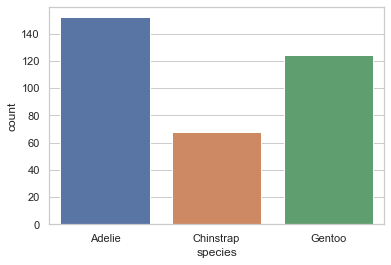

In [33]:
sns.countplot(data=df, x="species")

We can specify the parameter `hue` with another variable to add a secondary category to get a more detailed count result.

<AxesSubplot:xlabel='species', ylabel='count'>

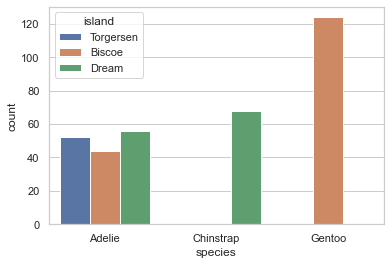

In [22]:
sns.countplot(data=df, x="species", hue="island")

From this detailed bar plot we can know that some species only exist in one island.

If we want to plot horizontally to make more space for category labels, we only need to use parameter `y`, instead of parameter `x` to choose the variable to be plotted.

<AxesSubplot:xlabel='count', ylabel='species'>

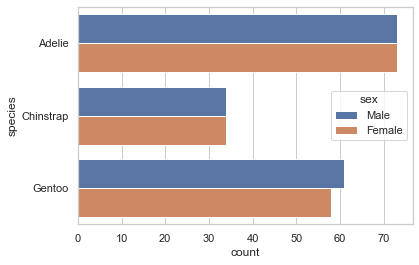

In [23]:
sns.countplot(data=df, y="species", hue="sex")

If we really care about the order, we can count the number of differenct categories and create a new DataFrame to store the result. Then we sort the new DataFrame and draw a bar plot based on it.

<AxesSubplot:xlabel='species'>

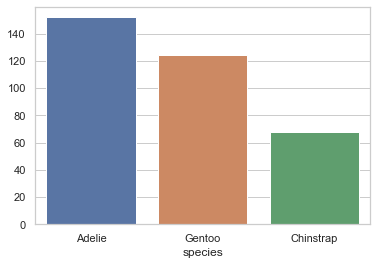

In [39]:
df_count_species = df.value_counts("species", sort=True, ascending=False)
sns.barplot(x=df_count_species.index, y=df_count_species.values)


### 2.1.2 Ordinal data

Ordinal data means that the categories have logical order in which we have to plot them, such as different classes of boat tickets. 

`seaborn.countplot()` can use specific order to plot categories by specifing the parameter `order` (and `hue_order`), but the default order which is inferred from the dataset is usually the right order.

In [24]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='class', ylabel='count'>

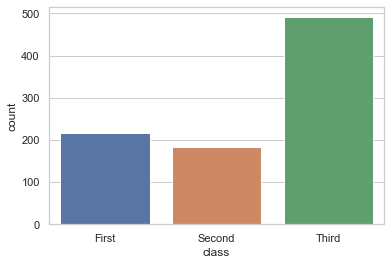

In [25]:
sns.countplot(data=df, x="class")

We can specify the parameter `hue` with another variable to add a secondary category to get a more detailed count result.

<AxesSubplot:xlabel='class', ylabel='count'>

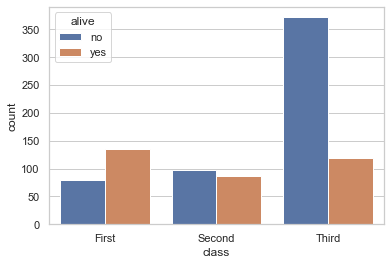

In [26]:
sns.countplot(data=df, x="class", hue="alive")

According to the detailed bar plot, we can conclude that people in the third class have the lowest survival rate.

If we want to plot horizontally to make more space for category labels, we only need to use parameter `y`, instead of parameter `x` to choose the variable to be plotted.

<AxesSubplot:xlabel='count', ylabel='deck'>

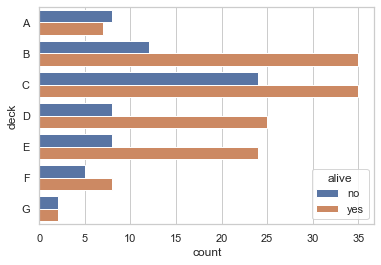

In [27]:
sns.countplot(data=df, y="deck", hue="alive")

## 2.2 Cleveland dot plot
Cleveland dot plot is a better alternative to bar plots when there are too many categories in a categorical variable. When draw a cleveland dot plot, we should also sort the categories just like what we did for norminal data.

We will use `seaborn.stripplot()` to draw the cleveland dot plot. Click [here](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) to see the specific instructions.

In [29]:
crashes = sns.load_dataset("car_crashes")
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


`seaborn.stripplot()` does not provide the parameter to sort categories according to the values with the help of the class `seaborn.PairGrid`, click [here](https://seaborn.pydata.org/generated/seaborn.PairGrid.html?highlight=pairgrid) to see the instruction about it. Thus, we should sort the dataset before draw a plot.

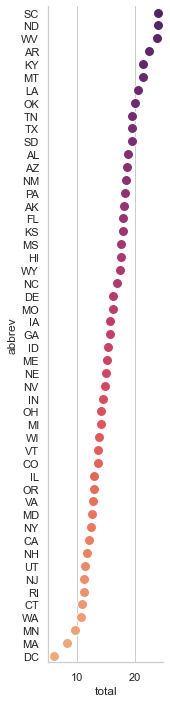

In [34]:
# sort the dataset
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                x_vars=crashes.columns[0], y_vars=["abbrev"],
                height=10, aspect=.25)

# draw the dot plot using stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

### 2.2.1 Cleveland dot plot with multiple dots
`seaborn` does not provide efficient way to draw multiple dots, so we have to reshape the dataset with the help of `.melt()` method and use the parameter `hue`.

<AxesSubplot:xlabel='count', ylabel='abbrev'>

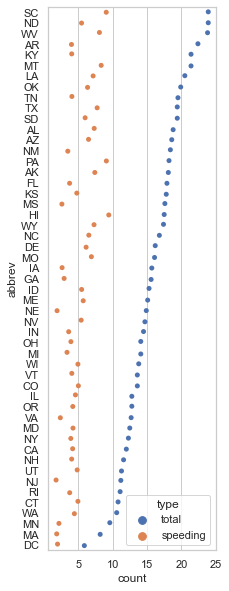

In [54]:
# sort the dataset according to the "total" column
crashes_sorted = crashes.sort_values("total", ascending=False)[["total", "speeding", "abbrev"]]

# reshape the dataset by .melt()
crashes_melt = crashes_sorted.melt(id_vars="abbrev", value_vars=["total", "speeding"], value_name="count", var_name="type")

# we need a high plot
plt.figure(figsize=(3, 10))

sns.stripplot(data=crashes_melt, x="count", y="abbrev", hue="type")


### 2.2.2 Cleveland dot plot with facets
With the help of `seaborn.PairGrid()`, we can split the graph into several sub-plots.

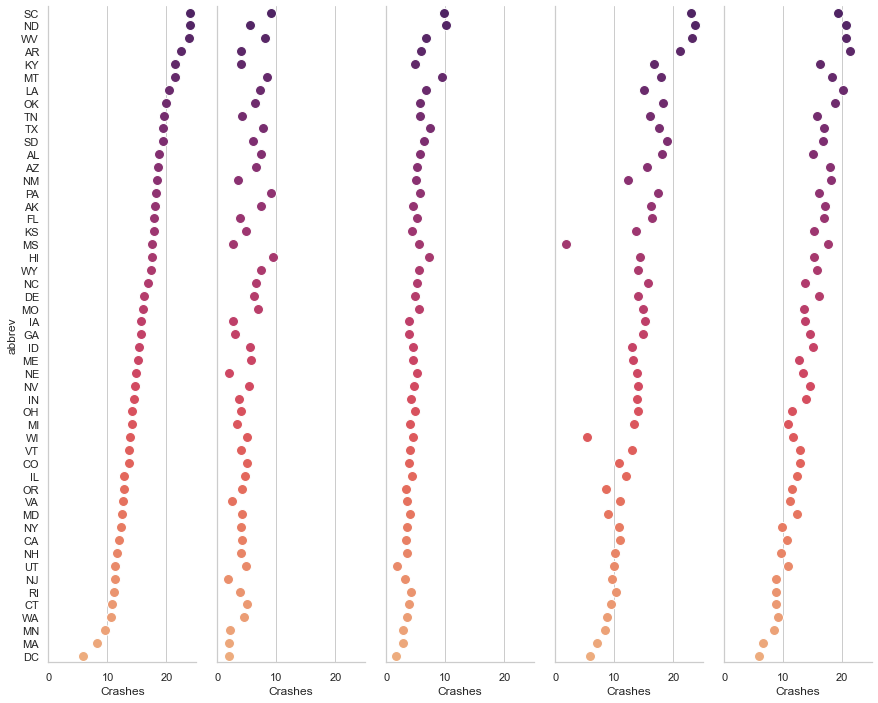

In [56]:
# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="abbrev")